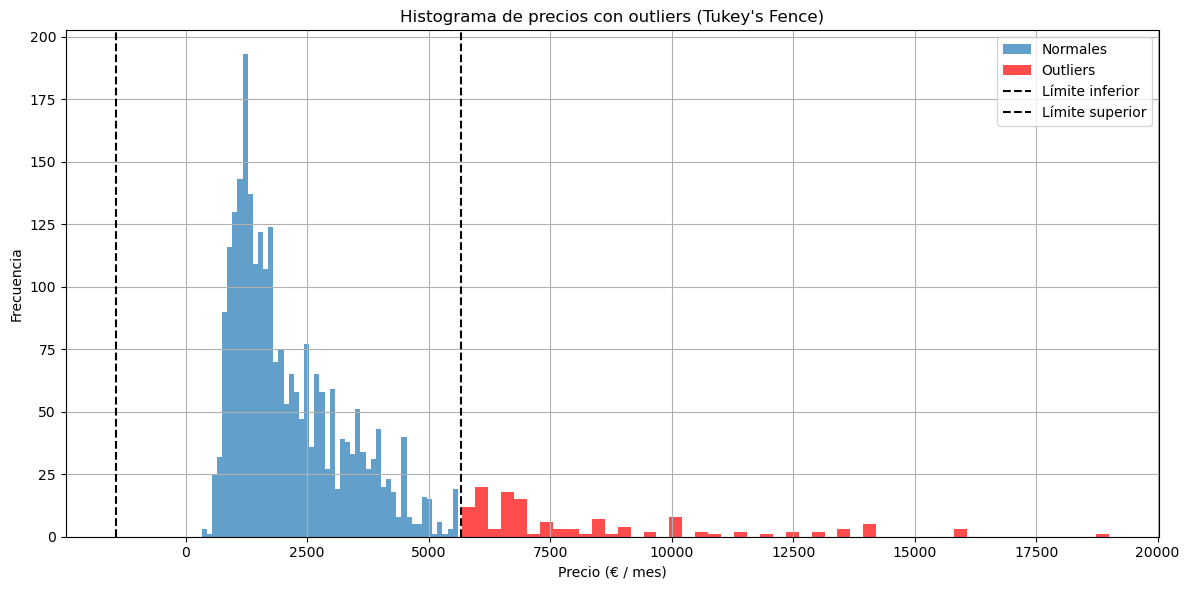

✅ Outliers guardados como: C:/Users/pablo/proyecto/outliers/outliers_precio.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo limpio en formato JSON
ruta = "C:/Users/pablo/proyecto/outliers/alquiler_comparador_limpio.json"
df = pd.read_json(ruta, orient="table")  # <- CORRECTO para JSON con orient="table"

# Usamos directamente 'precio_num' que ya está limpio
df = df.dropna(subset=["precio_num"])

# Cálculo de Tukey
Q1 = df["precio_num"].quantile(0.25)
Q3 = df["precio_num"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Marcar outliers
df["es_outlier"] = (df["precio_num"] < lim_inf) | (df["precio_num"] > lim_sup)

# Histograma
normales = df[~df["es_outlier"]]["precio_num"]
outliers = df[df["es_outlier"]]["precio_num"]

plt.figure(figsize=(12, 6))
plt.hist(normales, bins=50, alpha=0.7, label="Normales")
plt.hist(outliers, bins=50, alpha=0.7, color="red", label="Outliers")
plt.axvline(lim_inf, linestyle="dashed", color="black", label="Límite inferior")
plt.axvline(lim_sup, linestyle="dashed", color="black", label="Límite superior")
plt.title("Histograma de precios con outliers (Tukey's Fence)")
plt.xlabel("Precio (€ / mes)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar los outliers en CSV
out_csv = "C:/Users/pablo/proyecto/outliers/outliers_precio.csv"
df[df["es_outlier"]].to_csv(out_csv, index=False)
print(f"✅ Outliers guardados como: {out_csv}")



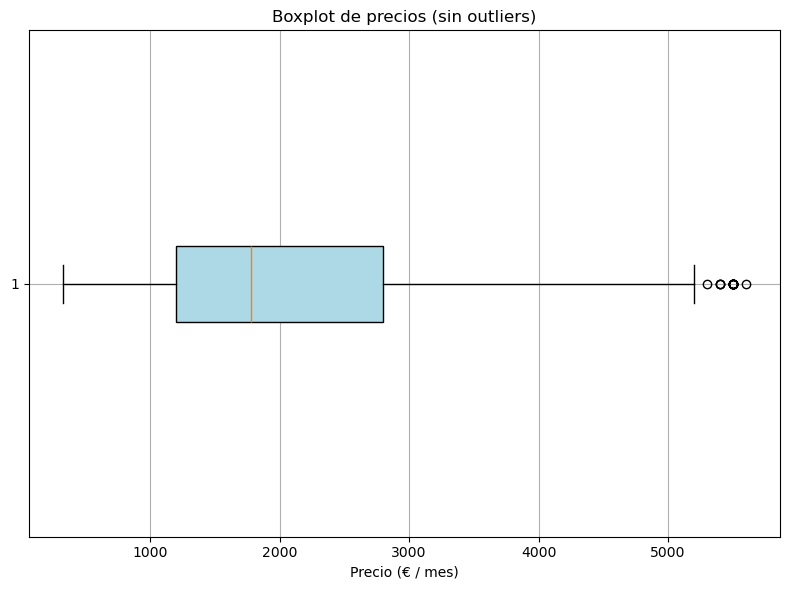

In [20]:

ruta = "C:/Users/pablo/proyecto/outliers/alquiler_comparador_limpio.json"
df = pd.read_json(ruta, orient="table") 


df = df.dropna(subset=["precio_num"])

# Opcional: Eliminar outliers (Tukey) para mostrar solo precios típicos
Q1 = df["precio_num"].quantile(0.25)
Q3 = df["precio_num"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_filtrado = df[(df["precio_num"] >= lim_inf) & (df["precio_num"] <= lim_sup)]

# 📦 Generar Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtrado["precio_num"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot de precios (sin outliers)")
plt.xlabel("Precio (€ / mes)")
plt.grid(True)
plt.tight_layout()
plt.show()
